<a href="https://colab.research.google.com/github/Manisha1208/NNDL/blob/main/Assignment_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import minmax_scale
from sklearn.model_selection import train_test_split
import seaborn as sns
from scipy import stats

In [32]:
data = pd.read_csv(r"/content/Assignment_6.csv")
data

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [33]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [34]:
data.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.401822e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.673622e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [35]:
data.corr()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.000000,-0.016797,0.001286,0.005160,-0.012258,-0.132109,0.018525,-0.002721,0.011592,-0.023783,0.008130,-0.010842,-0.005151,0.021380,-0.016907,-0.008224,-0.001891,0.020799,-0.002901,-0.138798
price,-0.016797,1.000000,0.308338,0.525134,0.702044,0.089655,0.256786,0.266331,0.397346,0.036392,0.667463,0.605566,0.323837,0.053982,0.126442,-0.053168,0.306919,0.021571,0.585374,0.082456
bedrooms,0.001286,0.308338,1.000000,0.515884,0.576671,0.031703,0.175429,-0.006582,0.079532,0.028472,0.356967,0.477600,0.303093,0.154178,0.018841,-0.152668,-0.008931,0.129473,0.391638,0.029244
bathrooms,0.005160,0.525134,0.515884,1.000000,0.754665,0.087740,0.500653,0.063744,0.187737,-0.124982,0.664983,0.685342,0.283770,0.506019,0.050739,-0.203866,0.024573,0.223042,0.568634,0.087175
sqft_living,-0.012258,0.702044,0.576671,0.754665,1.000000,0.172826,0.353949,0.103818,0.284611,-0.058753,0.762704,0.876597,0.435043,0.318049,0.055363,-0.199430,0.052529,0.240223,0.756420,0.183286
sqft_lot,-0.132109,0.089655,0.031703,0.087740,0.172826,1.000000,-0.005201,0.021604,0.074710,-0.008958,0.113621,0.183512,0.015286,0.053080,0.007644,-0.129574,-0.085683,0.229521,0.144608,0.718557
floors,0.018525,0.256786,0.175429,0.500653,0.353949,-0.005201,1.000000,0.023698,0.029444,-0.263768,0.458183,0.523885,-0.245705,0.489319,0.006338,-0.059121,0.049614,0.125419,0.279885,-0.011269
waterfront,-0.002721,0.266331,-0.006582,0.063744,0.103818,0.021604,0.023698,1.000000,0.401857,0.016653,0.082775,0.072075,0.080588,-0.026161,0.092885,0.030285,-0.014274,-0.041910,0.086463,0.030703
view,0.011592,0.397346,0.079532,0.187737,0.284611,0.074710,0.029444,0.401857,1.000000,0.045990,0.251321,0.167649,0.276947,-0.053440,0.103917,0.084827,0.006157,-0.078400,0.280439,0.072575
condition,-0.023783,0.036392,0.028472,-0.124982,-0.058753,-0.008958,-0.263768,0.016653,0.045990,1.000000,-0.144674,-0.158214,0.174105,-0.361417,-0.060618,0.003026,-0.014941,-0.106500,-0.092824,-0.003406


In [36]:
data.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [37]:
data_x = df['sqft_living']
data_y = df['price']

Text(0, 0.5, 'price of house')

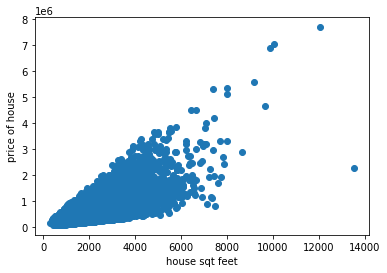

In [38]:
plt.scatter(data_x,data_y)
plt.xlabel("house sqt feet")
plt.ylabel("price of house")

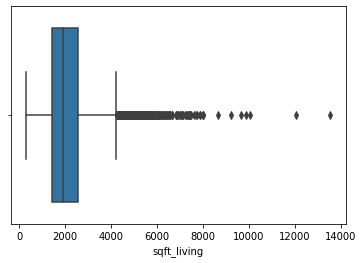

In [39]:
sns.boxplot(x=df['sqft_living'])

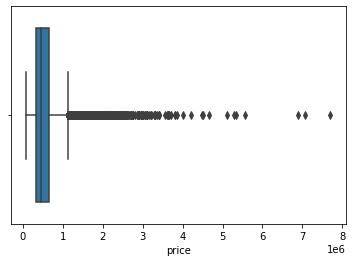

In [13]:
sns.boxplot(x=df['price'])

In [40]:
df = df[['sqft_living','price']]
z = np.abs(stats.zscore(df))
filter = df[(z < 3).all(axis=1)]
print(filter)
print("\nlength of data:",len(df))
print("lenth of filter:",len(filter))

       sqft_living     price
0             1180  221900.0
1             2570  538000.0
2              770  180000.0
3             1960  604000.0
4             1680  510000.0
...            ...       ...
21608         1530  360000.0
21609         2310  400000.0
21610         1020  402101.0
21611         1600  400000.0
21612         1020  325000.0

[21088 rows x 2 columns]

length of data: 21613
lenth of filter: 21088


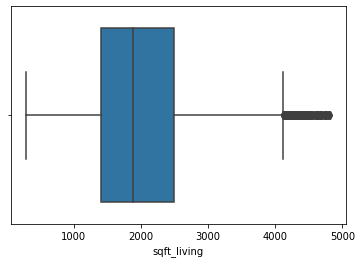

In [41]:
sns.boxplot(x=filter['sqft_living'])

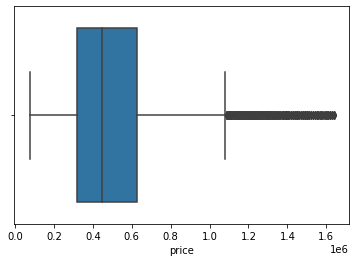

In [42]:
sns.boxplot(x=filter['price'])

In [43]:
df

,sqft_living,price
0,1180,221900.0
1,2570,538000.0
2,770,180000.0
3,1960,604000.0
4,1680,510000.0
...,...,...
21608,1530,360000.0
21609,2310,400000.0
21610,1020,402101.0
21611,1600,400000.0


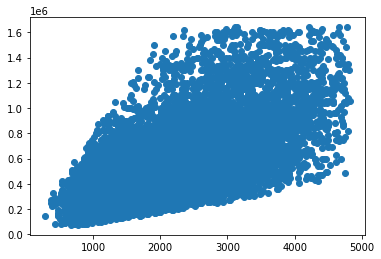

In [44]:
plt.scatter(filter['sqft_living'],filter['price'])

In [45]:
q1 = df.quantile(0.25)
q3 = df.quantile(0.75)
iqr = q3 - q1
iqr

sqft_living      1123.0
price          323050.0
dtype: float64

In [46]:
print((data < (q1 - iqr*1.5)) | (data > (q3 + iqr*1.5)))

       bathrooms  bedrooms  condition  ...  yr_built  yr_renovated  zipcode
0          False     False      False  ...     False         False    False
1          False     False      False  ...     False         False    False
2          False     False      False  ...     False         False    False
3          False     False      False  ...     False         False    False
4          False     False      False  ...     False         False    False
...          ...       ...        ...  ...       ...           ...      ...
21608      False     False      False  ...     False         False    False
21609      False     False      False  ...     False         False    False
21610      False     False      False  ...     False         False    False
21611      False     False      False  ...     False         False    False
21612      False     False      False  ...     False         False    False

[21613 rows x 21 columns]


In [47]:
df.shape

(21613, 2)

In [48]:
data_cleared = df[~((data < (q1 - 1.5 * iqr)) |(data > (q3 + 1.5 * iqr))).any(axis=1)]
data_cleared.shape

(20280, 2)

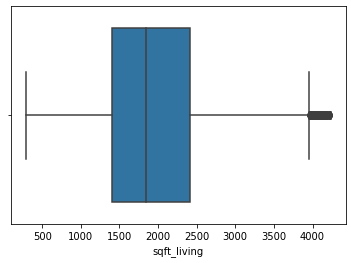

In [49]:
sns.boxplot(x=data_cleared['sqft_living'])

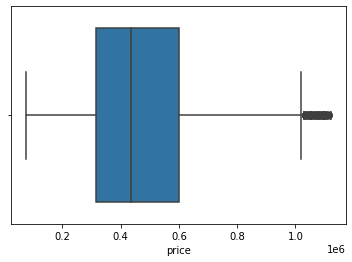

In [50]:
sns.boxplot(x=data_cleared['price'])

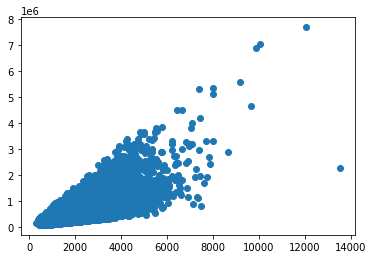

In [51]:
plt.scatter(data_x,data_y)

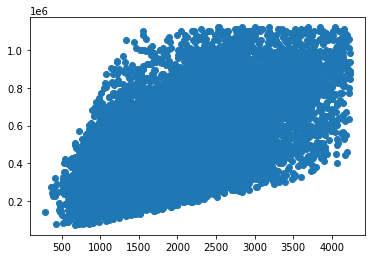

In [52]:
plt.scatter(data_cleared['sqft_living'],data_cleared['price'])

In [53]:
data_cleared.shape

(20280, 2)

In [54]:
data_x = data_cleared['sqft_living']
data_y = data_cleared['price']

Normalisation of data set

In [55]:
data_x = (data_x - data_x.min())/(data_x.max() - data_x.min())
data_y = (data_y - data_y.min())/(data_y.max() - data_y.min())
data_x = np.array(data_x)
data_y = np.array(data_y)

In [56]:
data2 = data_cleared.copy()

In [57]:
data_new = []
for i in range(len(data_x)):
    data_new.append([data_x[i],data_y[i]])
data_new[:5]

[[0.22588832487309646, 0.14057416267942582],
 [0.5786802030456852, 0.4430622009569378],
 [0.1218274111675127, 0.10047846889952153],
 [0.42385786802030456, 0.5062200956937799],
 [0.35279187817258884, 0.41626794258373206]]

In [58]:
data_new = pd.DataFrame(data_new,columns=['sqft_living','price'])
data_new

,sqft_living,price
0,0.225888,0.140574
1,0.578680,0.443062
2,0.121827,0.100478
3,0.423858,0.506220
4,0.352792,0.416268
...,...,...
20275,0.314721,0.272727
20276,0.512690,0.311005
20277,0.185279,0.313015
20278,0.332487,0.311005


Splitting data into Training and Testing data

In [59]:
from sklearn.model_selection import train_test_split

In [60]:
data_train,data_test = train_test_split(data_new,test_size=0.1)

In [61]:
# INITIALISING BATCH SIZE AND CALCULATING NUMBER OF BATCHES
bs = 1000
nb = np.ceil(len(data_train)/bs)
nb

19.0

Training the Model

In [62]:
# INITIALISING ALL REQUIRED PARAMETERS
iter = 1
# epochs = 10
epochs = 100
batch = nb - 1
bat = 1
alpha = 0.1 # LEARNING RATE
m = 1
c = -1
error = []

In [63]:
data_train

,sqft_living,price
6728,0.875635,0.382775
62,0.629442,0.232177
6177,0.494924,0.440191
19397,0.743655,0.526316
13376,0.527919,0.802764
...,...,...
15002,0.256345,0.155024
12373,0.274112,0.137799
19938,0.510152,0.245933
19200,0.282995,0.315789


In [64]:
data_x = np.array(data_train['sqft_living'])
data_y = np.array(data_train['price'])
len(data_x)

18252

In [67]:
count = 0
while (iter<=epochs):
  i = 0
  # print("iter =",iter)
  bat = 1
  # RUNNING ITERATION FOR N-1 BATCHES
  while (bat <= batch):
    der_m = 0
    der_c = 0
    err = 0
    # print("bat = ",bat)
    for k in range(0,bs):
      der_m = der_m + (data_y[i] - (m*data_x[i])-c)*(data_x[i])
      der_c = der_c + (data_y[i] - (m*data_x[i])-c)
      i = i+1
      
    err = der_c**2
    err = (1/(2*bs))*err
    error.append(err)
    
    
    der_m = (-1/bs)*der_m
    der_c = (-1/bs)*der_c
    change_m = (-1)*alpha*der_m
    change_c = (-1)*alpha*der_c
    
    m = m + change_m
    c = c + change_c
    bat = bat + 1
    # print("new bat = ",bat,"\n")
    # EXECUTING FOR LAST BATCH
  der_m = 0
  der_c = 0
  err = 0
  count = count + 1
  # print("end")
  
  # FINDING REMAINING NUMBER OF BATCHES
  es = len(data_x) - i  
  
  for k in range(i,len(data_x)):
    der_m = der_m + (data_y[i] - (m*data_x[i])-c)*(data_x[i])
    der_c = der_c + (data_y[i] - (m*data_x[i])-c)
    i = i + 1
  
  err = der_c**2
  err = (1/(2*es))*err
  error.append(err)

  der_m = (-1/es)*der_m
  der_c = (-1/es)*der_c
  
  change_m = (-1)*alpha*der_m
  change_c = (-1)*alpha*der_c
  
  m = m + change_m
  c = c + change_c
  
  iter = iter + 1
  # print("new iter",iter,"\n")

print(m,c)
print(count)

0.6443797024661342 0.10795688708471171
100


MSE of training data

In [68]:
# MEAN SQUARE ERROR IN EXPONENTIAL FORM
# MINIMISED ERROR
mse = 0
for i in range(0,len(data_train)):
    mse += (data_y[i] - (m*data_x[i]) -c)**2
mse = (1/len(data_train))*mse
mse

0.02419008847285216

In [69]:
data_test = np.array(data_test)
data_test_x = data_test[:,0]
print(data_test_x)
data_test_y = data_test[:,1]
data_test_y

[0.90101523 0.39340102 0.24873096 ... 0.37817259 0.28680203 0.18020305]


array([0.4784689 , 0.23923445, 0.14449761, ..., 0.5215311 , 0.18181818,
       0.22009569])

In [70]:
len(data_test)

2028

In [72]:
# predicting results of test data set
pred = []
for i in range(len(data_test_x)):
  # print((m*data_test_x[i]) +c)
  pred.append((m*data_test_x[i]) +c)

# pred

MSE of testing data

In [73]:
mse = 0
for i in range(0,len(data_test)):
  mse += (data_test[i][1] - (m*data_test[i][0]) - c)**2
mse = mse/len(data_test)
mse

0.02357022670076298

Visualising testing data results

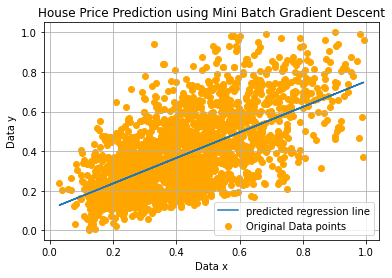

In [74]:
plt.scatter(data_test_x,data_test_y,label="Original Data points",color='orange')
plt.plot(data_test_x,pred,label="predicted regression line")
plt.title("House Price Prediction using Mini Batch Gradient Descent")
plt.xlabel("Data x")
plt.ylabel("Data y")
plt.grid()
plt.legend()
plt.show()

In [75]:
data_train = pd.DataFrame(data_train)

data_train_pred = m*data_train['sqft_living'] + c
data_train_pred

6728     0.672198
62       0.513556
6177     0.426876
19397    0.587153
13376    0.448137
           ...   
15002    0.273141
12373    0.284589
19938    0.436689
19200    0.290313
7909     0.240431
Name: sqft_living, Length: 18252, dtype: float64

Visualising results of Training data

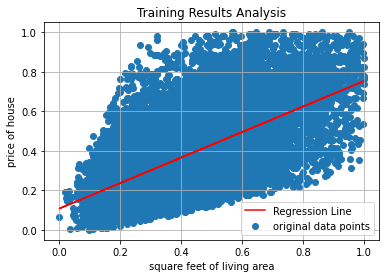

In [76]:
plt.plot(data_train['sqft_living'],data_train_pred,'red',label="Regression Line")
plt.scatter(data_train['sqft_living'],data_train['price'],label="original data points")
plt.xlabel("square feet of living area")
plt.ylabel("price of house")
plt.legend()
plt.grid()
plt.title("Training Results Analysis")
plt.show()
%matplotlib inline

ERROR RATE ANALYSIS

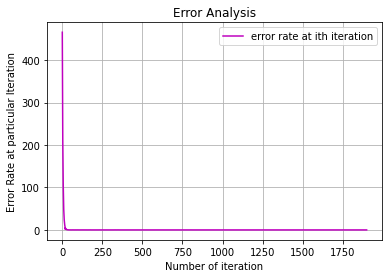

In [77]:
iters = np.arange(epochs*nb)
plt.plot(iters,error,color='m',label="error rate at ith iteration")
plt.legend()
plt.xlabel("Number of iteration")
plt.ylabel("Error Rate at particular Iteration")
plt.title("Error Analysis")
plt.grid()
plt.show()

In [78]:
len(error)

1900

In [79]:
mse = 0
mse = (data_train['price'] - m*data_train['sqft_living'] - c)**2
mse.sum()/len(data_train)

0.024190088472852186

In [80]:
min_x = data2['sqft_living'].min()
max_x = data2['sqft_living'].max()
min_y = data2['price'].min()
max_y = data2['price'].max()
print(min_x,min_y,max_x,max_y)

290 75000.0 4230 1120000.0


Deployment of model

In [81]:
input_x = float(input("enter square feet"))
input_x = (input_x - min_x)/(max_x - min_x)
output_y = m*input_x + c
output_y = (output_y)*(max_y - min_y) + min_y
output_y

enter square feet10000


1847329.8256681785